In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
csv_path = "API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_130193.csv"


df = pd.read_csv("API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_130193.csv", skiprows=4)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.900000,100.000000,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.859598,40.223744,43.035073,44.390861,46.282371,48.127211,48.801258,50.668330,NaN,NaN
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,97.700000,97.700000,93.400000,97.700000,97.700000,97.700000,85.300000,85.300000,NaN,NaN
3,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,51.045127,48.900728,51.335829,51.291577,51.856043,54.368599,55.686683,57.069267,NaN,NaN
4,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,41.800000,42.900000,45.300000,45.600000,47.000000,48.200000,48.500000,51.100000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,68.900000,79.200000,62.000000,72.800000,73.900000,74.900000,76.000000,83.600000,NaN,NaN
263,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.900000,84.400000,84.700000,85.000000,90.000000,89.300000,86.500000,87.700000,NaN,NaN
264,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,35.400000,40.300000,40.200000,43.000000,44.600000,46.700000,47.800000,51.100000,NaN,NaN


In [35]:
df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="AccessPct"
)
df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")
df_long["AccessPct"] = pd.to_numeric(df_long["AccessPct"], errors="coerce")

df_long = df_long[df_long["Year"] >= 1990]

df_final = df_long[["Country Name", "Year", "AccessPct"]]
df_final

,Country Name,Year,AccessPct
7980,Aruba,1990.0,100.0
7981,Africa Eastern and Southern,1990.0,NaN
7982,Afghanistan,1990.0,NaN
7983,Africa Western and Central,1990.0,NaN
7984,Angola,1990.0,NaN
...,...,...,...
17285,Kosovo,2024.0,NaN
17286,"Yemen, Rep.",2024.0,NaN
17287,South Africa,2024.0,NaN
17288,Zambia,2024.0,NaN


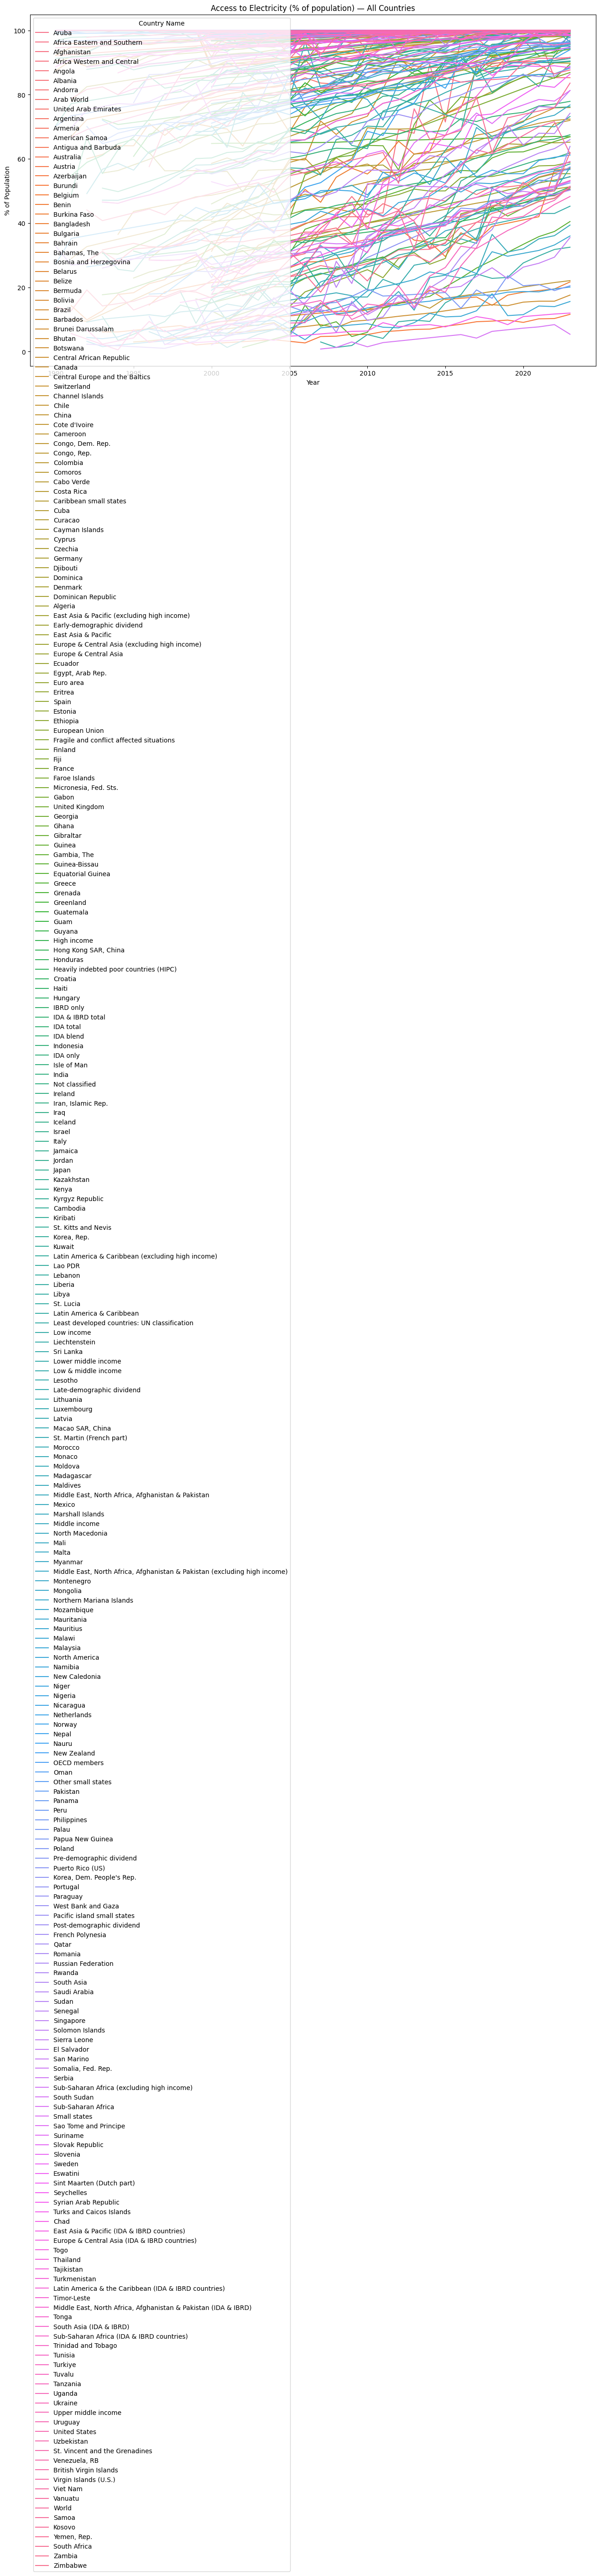

In [39]:

plt.figure(figsize=(16,10))
sns.lineplot(data=df_final, x="Year", y="AccessPct", hue="Country Name")
plt.title("Access to Electricity (% of population) — All Countries")
plt.ylabel("% of Population")
plt.show()